In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [29]:
x= salary_data.drop('salary_more_then_100k', axis= 1)
y= salary_data['salary_more_then_100k']
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [30]:
# preproccesing using labelencoder
le_comp= LabelEncoder()
x['company'] = le_comp.fit_transform(x['company'])

le_job= LabelEncoder()
x['job']= le_job.fit_transform(x['job'])

le_degree= LabelEncoder()
x['degree']= le_degree.fit_transform(x['degree'])

In [32]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
# create tree ti its complete depth
model= DecisionTreeClassifier()

In [33]:
model.fit(x,y)

DecisionTreeClassifier()

In [11]:
model.get_depth()

5

In [12]:
model.score(x,y)

1.0

In [19]:
model5=DecisionTreeClassifier(max_depth=3)     #(hyperparameter)
model5.fit(x,y)
model5.score(x,y)

0.9375

In [20]:
y_pred= model5.predict(x)
pd.DataFrame({'True values':y, 'predictions': y_pred})

,True values,predictions
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,1,1


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

cm= confusion_matrix(y,y_pred)
print(cm)

[[6 0]
 [1 9]]


Text(50.722222222222214, 0.5, 'true values')

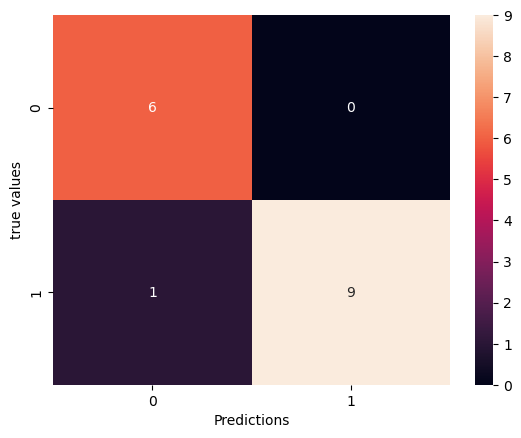

In [23]:
import seaborn as sns

sns.heatmap(cm,annot=True)
plt.xlabel('Predictions')
plt.ylabel('true values')

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.90      0.95        10

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16



In [34]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# marking predictions
company = input('Enter The Company : abc pharma, google, facebook\n')
company = int(le_comp.transform([[company]]))

job = input('Enter the Job Title : sales executive, business manager, computer programmer\n')
job = int(le_job.transform([[job]]))

degree = input('Enter The Degree : masters, bachelors\n' )
degree = int(le_degree.transform([[degree]]))

Enter The Company : abc pharma, google, facebook
google
Enter the Job Title : sales executive, business manager, computer programmer
business manager
Enter The Degree : masters, bachelors
masters


In [39]:
model5.predict([[company,job,degree]])

array([1], dtype=int64)